In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
from pylab import rcParams
rcParams['figure.figsize'] = (9, 6)
from io import StringIO
import pydot

### Данные

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [7]:
y_train = train.Survived
train.drop('Survived', axis=1, inplace=True)

In [8]:
train.columns == test.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [9]:
train['is_test'] = 0
test['is_test'] = 1

In [10]:
df = pd.concat([train, test])

In [11]:
df["isMale"] = df.Sex.replace({"male": 1, "female":0})
df.drop(["Sex", "Cabin", "Ticket", "Name", "PassengerId"], axis=1, inplace=True)

In [12]:
df.Pclass.value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

In [13]:
df_dummies = pd.get_dummies(df, columns=['Pclass', 'Embarked'])

In [16]:
X_train = df_dummies[df_dummies.is_test==0].drop('is_test', axis=1)
X_test = df_dummies[df_dummies.is_test==1].drop('is_test', axis=1)

In [17]:
columns = X_train.columns

In [19]:
from sklearn.preprocessing import Imputer

In [20]:
imputer = Imputer(missing_values='NaN', strategy='mean', axis=0, verbose=0, copy=True)

In [21]:
imputer.fit(X_train)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)

In [22]:
X_train_imputed = imputer.transform(X_train)
X_train_imputed = pd.DataFrame(X_train_imputed, columns=columns)

### Нормировка значений

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()

In [26]:
scaler.fit(X_train_imputed)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [27]:
X_train_imputed_scaled = scaler.transform(X_train_imputed)
X_train_imputed_scaled = pd.DataFrame(X_train_imputed_scaled, columns=columns)

In [29]:
X_test_imputed_scaled = scaler.transform(imputer.transform(X_test))

### Разделение на обучающую и тестирующую выборки

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train_fin, X_val, y_train_fin, y_val = train_test_split(X_train_imputed_scaled, y_train, test_size=0.2)

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [33]:
cs = np.arange(1,300)

In [34]:
mf = np.arange(1,11)

In [35]:
cvv = np.arange(1,11)

In [36]:
grid = {'max_depth': cs, 'max_features' : mf}
gridsearch = GridSearchCV(DecisionTreeClassifier(), grid, scoring='accuracy', cv=3)
gridsearch1 = GridSearchCV(DecisionTreeClassifier(), grid, scoring='accuracy', cv=5)
gridsearch2 = GridSearchCV(DecisionTreeClassifier(), grid, scoring='accuracy', cv=7)
gridsearch3 = GridSearchCV(DecisionTreeClassifier(), grid, scoring='accuracy', cv=9)
gridsearch4 = GridSearchCV(DecisionTreeClassifier(), grid, scoring='accuracy', cv=10)
gridsearch5 = GridSearchCV(DecisionTreeClassifier(), grid, scoring='accuracy', cv=11)
gridsearch6 = GridSearchCV(DecisionTreeClassifier(), grid, scoring='accuracy', cv=13)

In [43]:
gridsearch6.fit(X_train_fin, y_train_fin)

GridSearchCV(cv=13, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': array([  1,   2, ..., 298, 299]), 'max_features': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [44]:
sorted(gridsearch6.grid_scores_, key = lambda x: -x.mean_validation_score)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.81461, std: 0.04704, params: {'max_depth': 4, 'max_features': 8},
 mean: 0.81461, std: 0.04743, params: {'max_depth': 7, 'max_features': 8},
 mean: 0.81320, std: 0.04678, params: {'max_depth': 3, 'max_features': 8},
 mean: 0.81320, std: 0.06143, params: {'max_depth': 6, 'max_features': 8},
 mean: 0.81039, std: 0.04576, params: {'max_depth': 7, 'max_features': 9},
 mean: 0.80758, std: 0.04862, params: {'max_depth': 4, 'max_features': 9},
 mean: 0.80758, std: 0.05173, params: {'max_depth': 6, 'max_features': 7},
 mean: 0.80618, std: 0.04092, params: {'max_depth': 7, 'max_features': 7},
 mean: 0.80478, std: 0.04623, params: {'max_depth': 4, 'max_features': 6},
 mean: 0.80337, std: 0.04898, params: {'max_depth': 5, 'max_features': 7},
 mean: 0.80337, std: 0.05707, params: {'max_depth': 6, 'max_features': 6},
 mean: 0.80337, std: 0.04842, params: {'max_depth': 7, 'max_features': 10},
 mean: 0.80337, std: 0.05201, params: {'max_depth': 9, 'max_features': 9},
 mean: 0.80197, std: 0.0

In [48]:
gridsearch6.best_params_
best_max_depth = gridsearch6.best_params_["max_depth"]
best_max_features = gridsearch6.best_params_["max_features"]
best_max_depth, best_max_features


(4, 8)

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
clf = DecisionTreeClassifier(max_depth=4 , max_features=8)

In [50]:
clf.fit(X_train_fin, y_train_fin)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [58]:
from sklearn.tree import export_graphviz
from sklearn import tree
import pydotplus
from PIL import Image

def get_tree_dot_view(clf, feature_names=None, class_names=None):
    print(export_graphviz(clf, out_file=None, filled=True, feature_names=feature_names, class_names=class_names))

In [55]:
dot_data = tree.export_graphviz(clf, feature_names=X_train.columns, out_file=None)

In [59]:
graph = pydotplus.graph_from_dot_data(dot_data) 
graph.write_pdf('df_train.pdf') 
graph.write_png('df_train.png') 
Image(graph.create_png())

TypeError: 'module' object is not callable

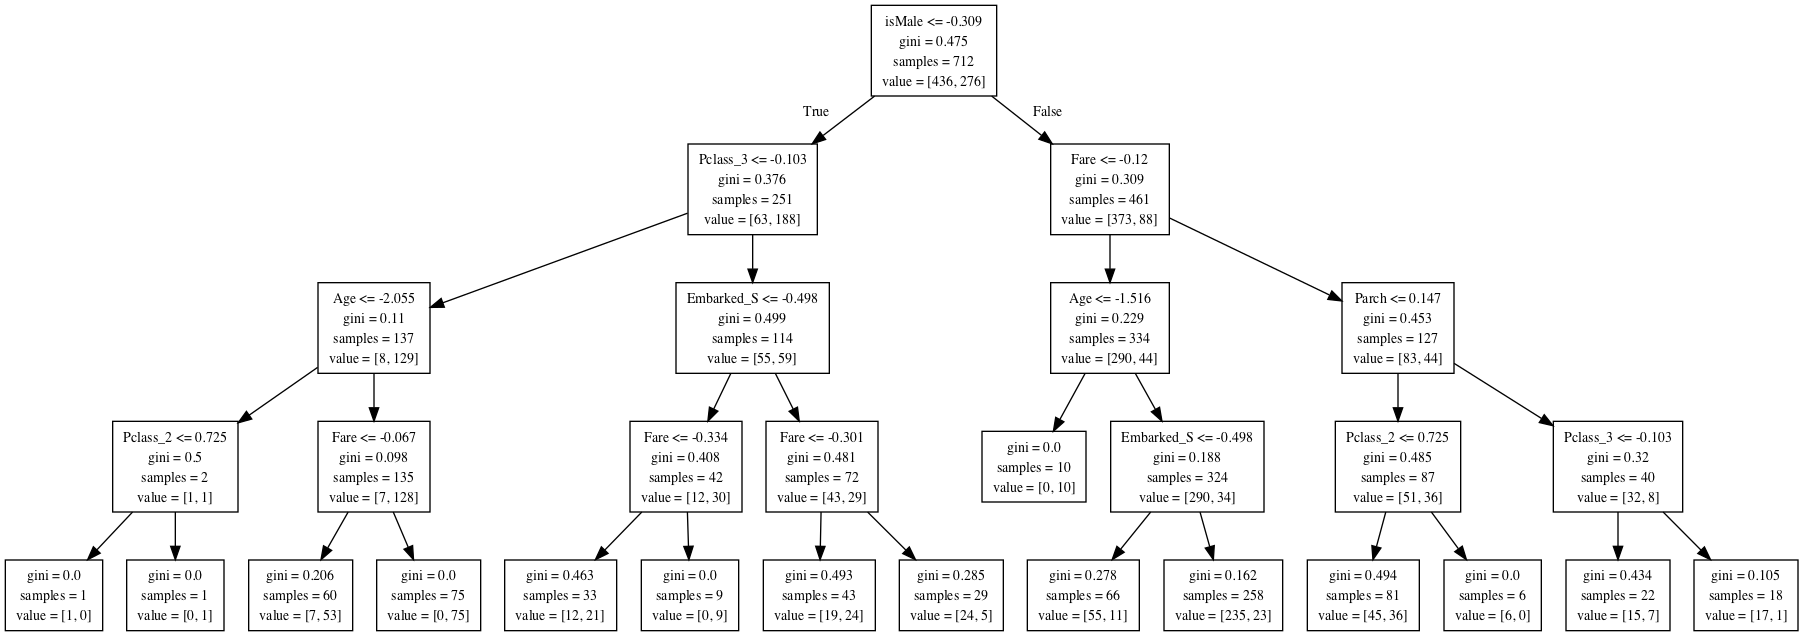

In [60]:
get_tree_dot_view(clf, list(X_train_fin.columns), train.columns)

digraph Tree {
node [shape=box, style="filled", color="black"] ;
0 [label="isMale <= -0.309\ngini = 0.475\nsamples = 712\nvalue = [436, 276]\nclass = PassengerId", fillcolor="#e581395e"] ;
1 [label="Pclass_3 <= -0.103\ngini = 0.376\nsamples = 251\nvalue = [63, 188]\nclass = Pclass", fillcolor="#399de5aa"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="Age <= -2.055\ngini = 0.11\nsamples = 137\nvalue = [8, 129]\nclass = Pclass", fillcolor="#399de5ef"] ;
1 -> 2 ;
3 [label="Pclass_2 <= 0.725\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = PassengerId", fillcolor="#e5813900"] ;
2 -> 3 ;
4 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = PassengerId", fillcolor="#e58139ff"] ;
3 -> 4 ;
5 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Pclass", fillcolor="#399de5ff"] ;
3 -> 5 ;
6 [label="Fare <= -0.067\ngini = 0.098\nsamples = 135\nvalue = [7, 128]\nclass = Pclass", fillcolor="#399de5f1"] ;
2 -> 6 ;
7 [label="gini = 0.206\nsamples = 60\nvalue = [7

''

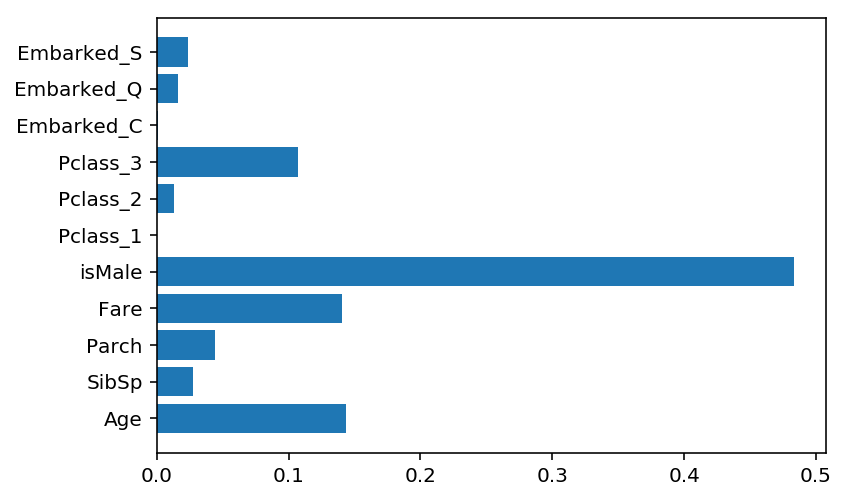

In [61]:
clf = DecisionTreeClassifier(max_depth=7, max_features=6)
clf.fit(X_train_fin, y_train_fin)

plt.barh(np.arange(len(clf.feature_importances_)), clf.feature_importances_)
plt.yticks(np.arange(len(X_train_fin.columns)),X_train_fin.columns)
''

In [88]:
clf.predict_proba(X_test_imputed_scaled)[:10]
predictions = clf.predict(X_test_imputed_scaled)

In [89]:
submussion = 'PassengerId,Survived\n'
submussion += "\n".join(["{},{}".format(pid, prediction) for pid, prediction in zip(test.PassengerId, predictions)])

In [90]:
with open('submission.txt', 'w') as file:
    file.write(submussion)